# Suy diễn thống kê bằng bootstrap 

### Bs. Lê Ngọc Khả Nhi

Cách đây 1 tuần Nhi đã giới thiệu với các bạn về phương pháp suy diễn thống kê bằng Bootstrap và estimation plots với package R package dabestr của tác giả Joses Ho và cộng sự người Singapore: http://rpubs.com/lengockhanhi/454078

Tin vui là các bạn dùng Python cũng có thể áp dụng phương pháp này với package dabest dành cho Python, có thể install từ: https://github.com/ACCLAB/DABEST-python ; (ngoài ra bạn còn cần matplotlib, scipy và numpy).

Sau đây là một thí dụ minh họa về tính năng của package dabest trong Python, Nhi sẽ dùng 1 dataset có thực: Thí nghiệm tương tác thuốc hạ áp MDL và chất gây tăng huyết áp Phenylbiguanide trên 5 con thỏ của J. Ludbrook (1994).

Đầu tiên ta tải dữ liệu từ database vincentarelbundock vào máy bằng pandas, sau đó recode biến Dose thành categorical.

In [1]:
import numpy as np
import pandas as pd
import dabest

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Rabbit.csv")
df['Dose'] = df['Dose'].astype('category')
dose_recode = {"Dose": {6.25: "D1",
                        12.50: "D2",
                        25.00: "D3",
                        50.00: "D4",
                        100.00: "D5",
                        200.00: "D6",
                       }}

df.replace(dose_recode, inplace=True)

df

,Unnamed: 0,BPchange,Dose,Run,Treatment,Animal
0,1,0.50,D1,C1,Control,R1
1,2,4.50,D2,C1,Control,R1
2,3,10.00,D3,C1,Control,R1
3,4,26.00,D4,C1,Control,R1
4,5,37.00,D5,C1,Control,R1
5,6,32.00,D6,C1,Control,R1
6,7,1.00,D1,C2,Control,R2
7,8,1.25,D2,C2,Control,R2
8,9,4.00,D3,C2,Control,R2
9,10,12.00,D4,C2,Control,R2


## So sánh 2 phân nhóm độc lập

Mục tiêu: So sánh biến BPchange giữa 2 phân nhóm Treatment.
dabest thực hiện 1 phân tích bootstrap cho khác biệt trung bình, 1 kiểm định t và 1 kiểm định Mann Whitnney đồng thời vẽ biểu đồ Gardner-Altman theo như Martin Gardner và Doug Altman đề xuất vào năm 1986.

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_ind_ttest,pvalue_mann_whitney
0,Control,MDL,-4.68,-11.005,1.43,97.0,True,False,0.115062,0.157733


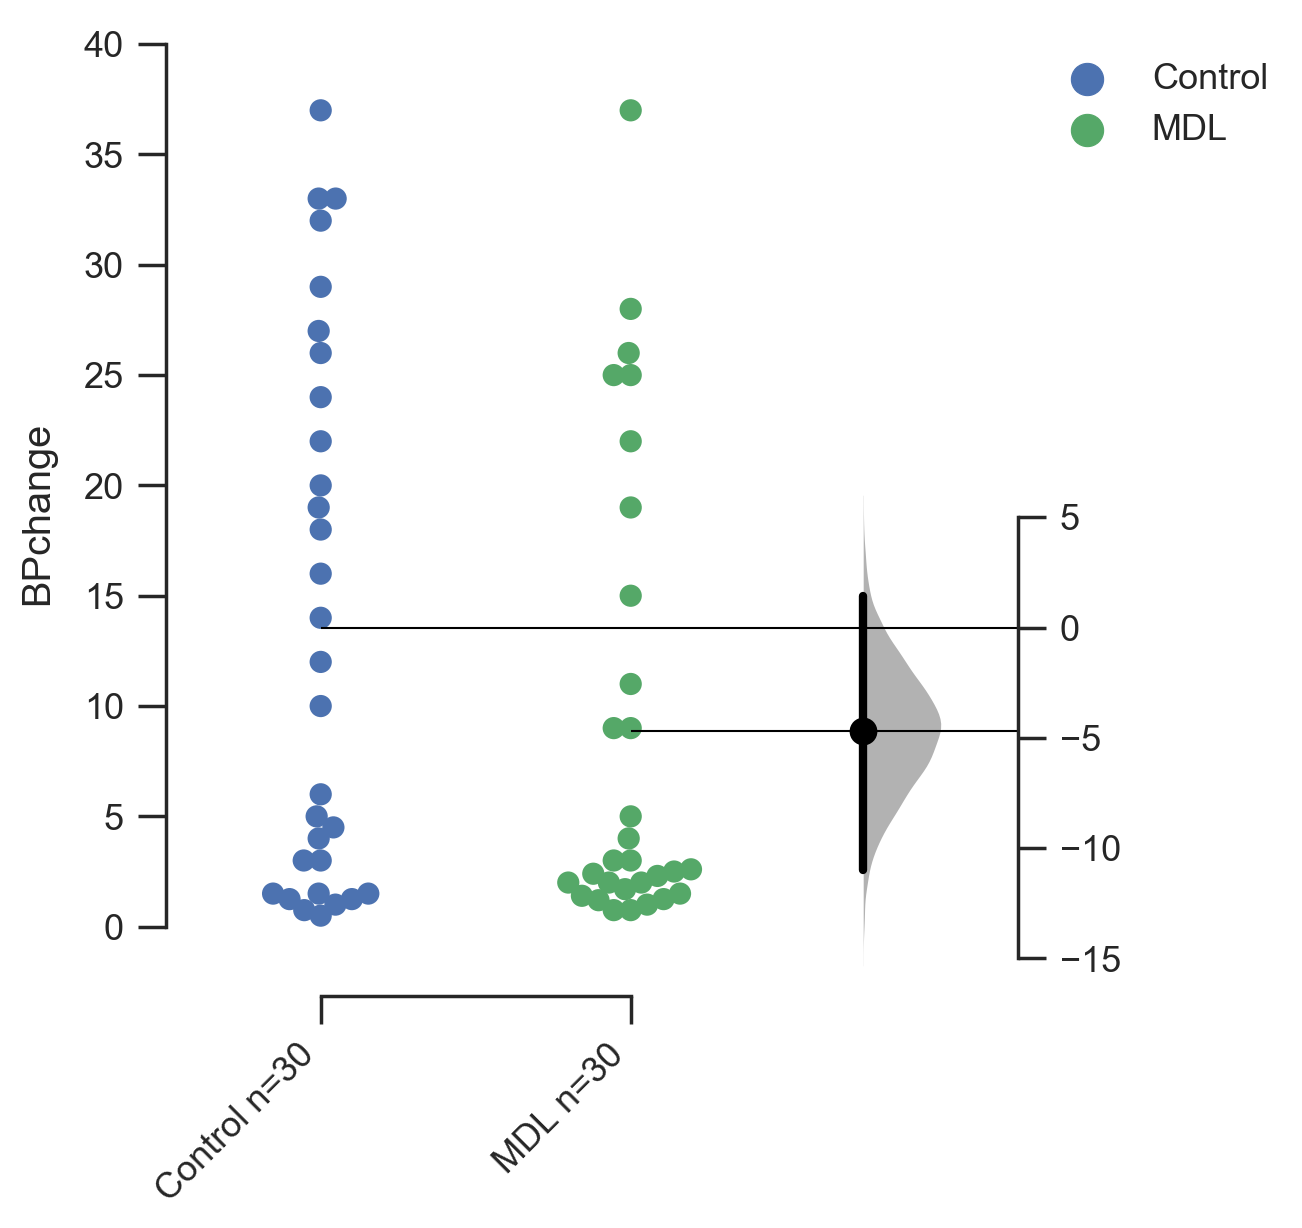

In [3]:
fig1, results1 = dabest.plot(df, x='Treatment',y='BPchange',
                             color_col='Treatment',
                             idx=("Control", "MDL"),ci=97)
results1

## So sánh 2 phân nhóm bắt cặp

Mục tiêu: So sánh BPchange giữa liều D1 và liều D3,
dbest thực hiện 1 phân tích bootstrap cho khác biệt trung bình, 1 kiểm định t cặp đôi và 1 kiểm định Wilcoxon sign rank, đồng thời vẽ biểu đồ slopgraph của Edward Tufte (1983).

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_paired_ttest,pvalue_wilcoxon
0,D1,D3,2.61,1.035,4.825,97.0,True,True,0.019371,0.028211


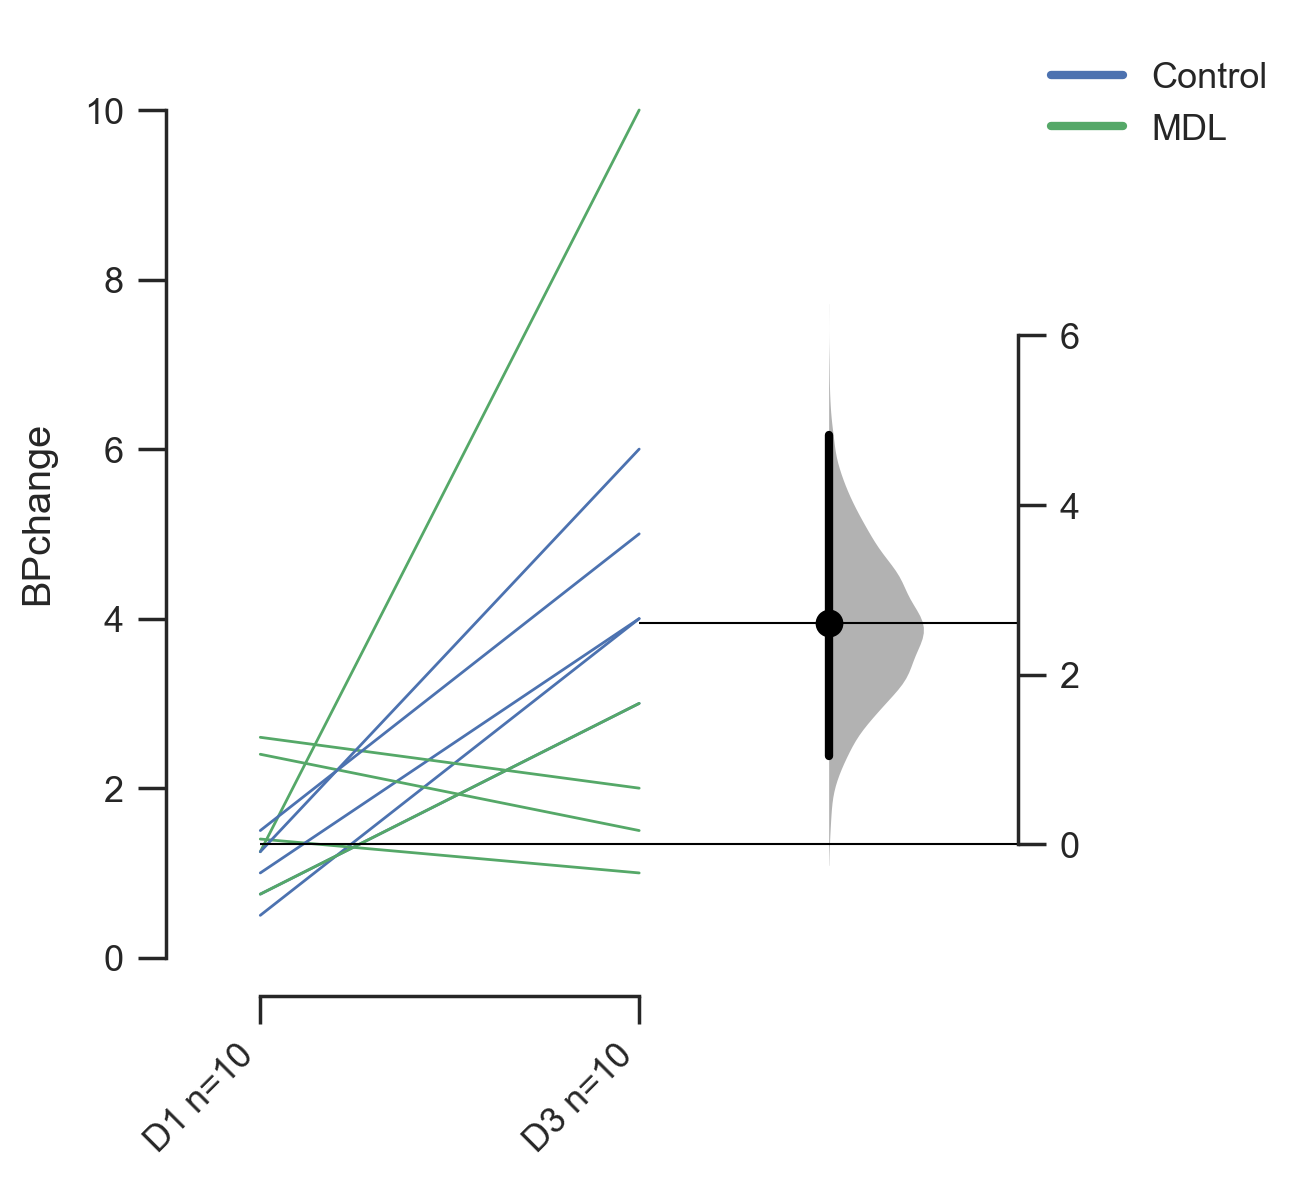

In [4]:
fig2, results2 = dabest.plot(df, x='Dose',y='BPchange',
                             color_col='Treatment',
                             idx=('D1', 'D3'),ci=97,
                            paired=True, id_col='Animal')
results2

## So sánh nhiều cặp dữ liệu

Mục tiêu: So sánh BPchange giữa liều 2 liều kế tiếp từ D1 đến D6, dbest thực hiện 5 phân tích bootstrap cho khác biệt trung bình, 5 kiểm định t cặp đôi và 5 kiểm định Wilcoxon sign rank, đồng thời vẽ biểu đồ estimation plot (Geoff Cumming 2012)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_paired_ttest,pvalue_wilcoxon
0,D1,D2,0.68,-0.040,1.710,97.0,True,True,0.137403,0.049804
1,D2,D3,1.93,0.495,3.385,97.0,True,True,0.024699,0.038152
2,D3,D4,6.85,3.400,10.700,97.0,True,True,0.004241,0.005005
3,D4,D5,11.70,2.900,18.600,97.0,True,True,0.011797,0.014369
4,D5,D6,4.20,-1.700,11.000,97.0,True,True,0.213905,0.239897


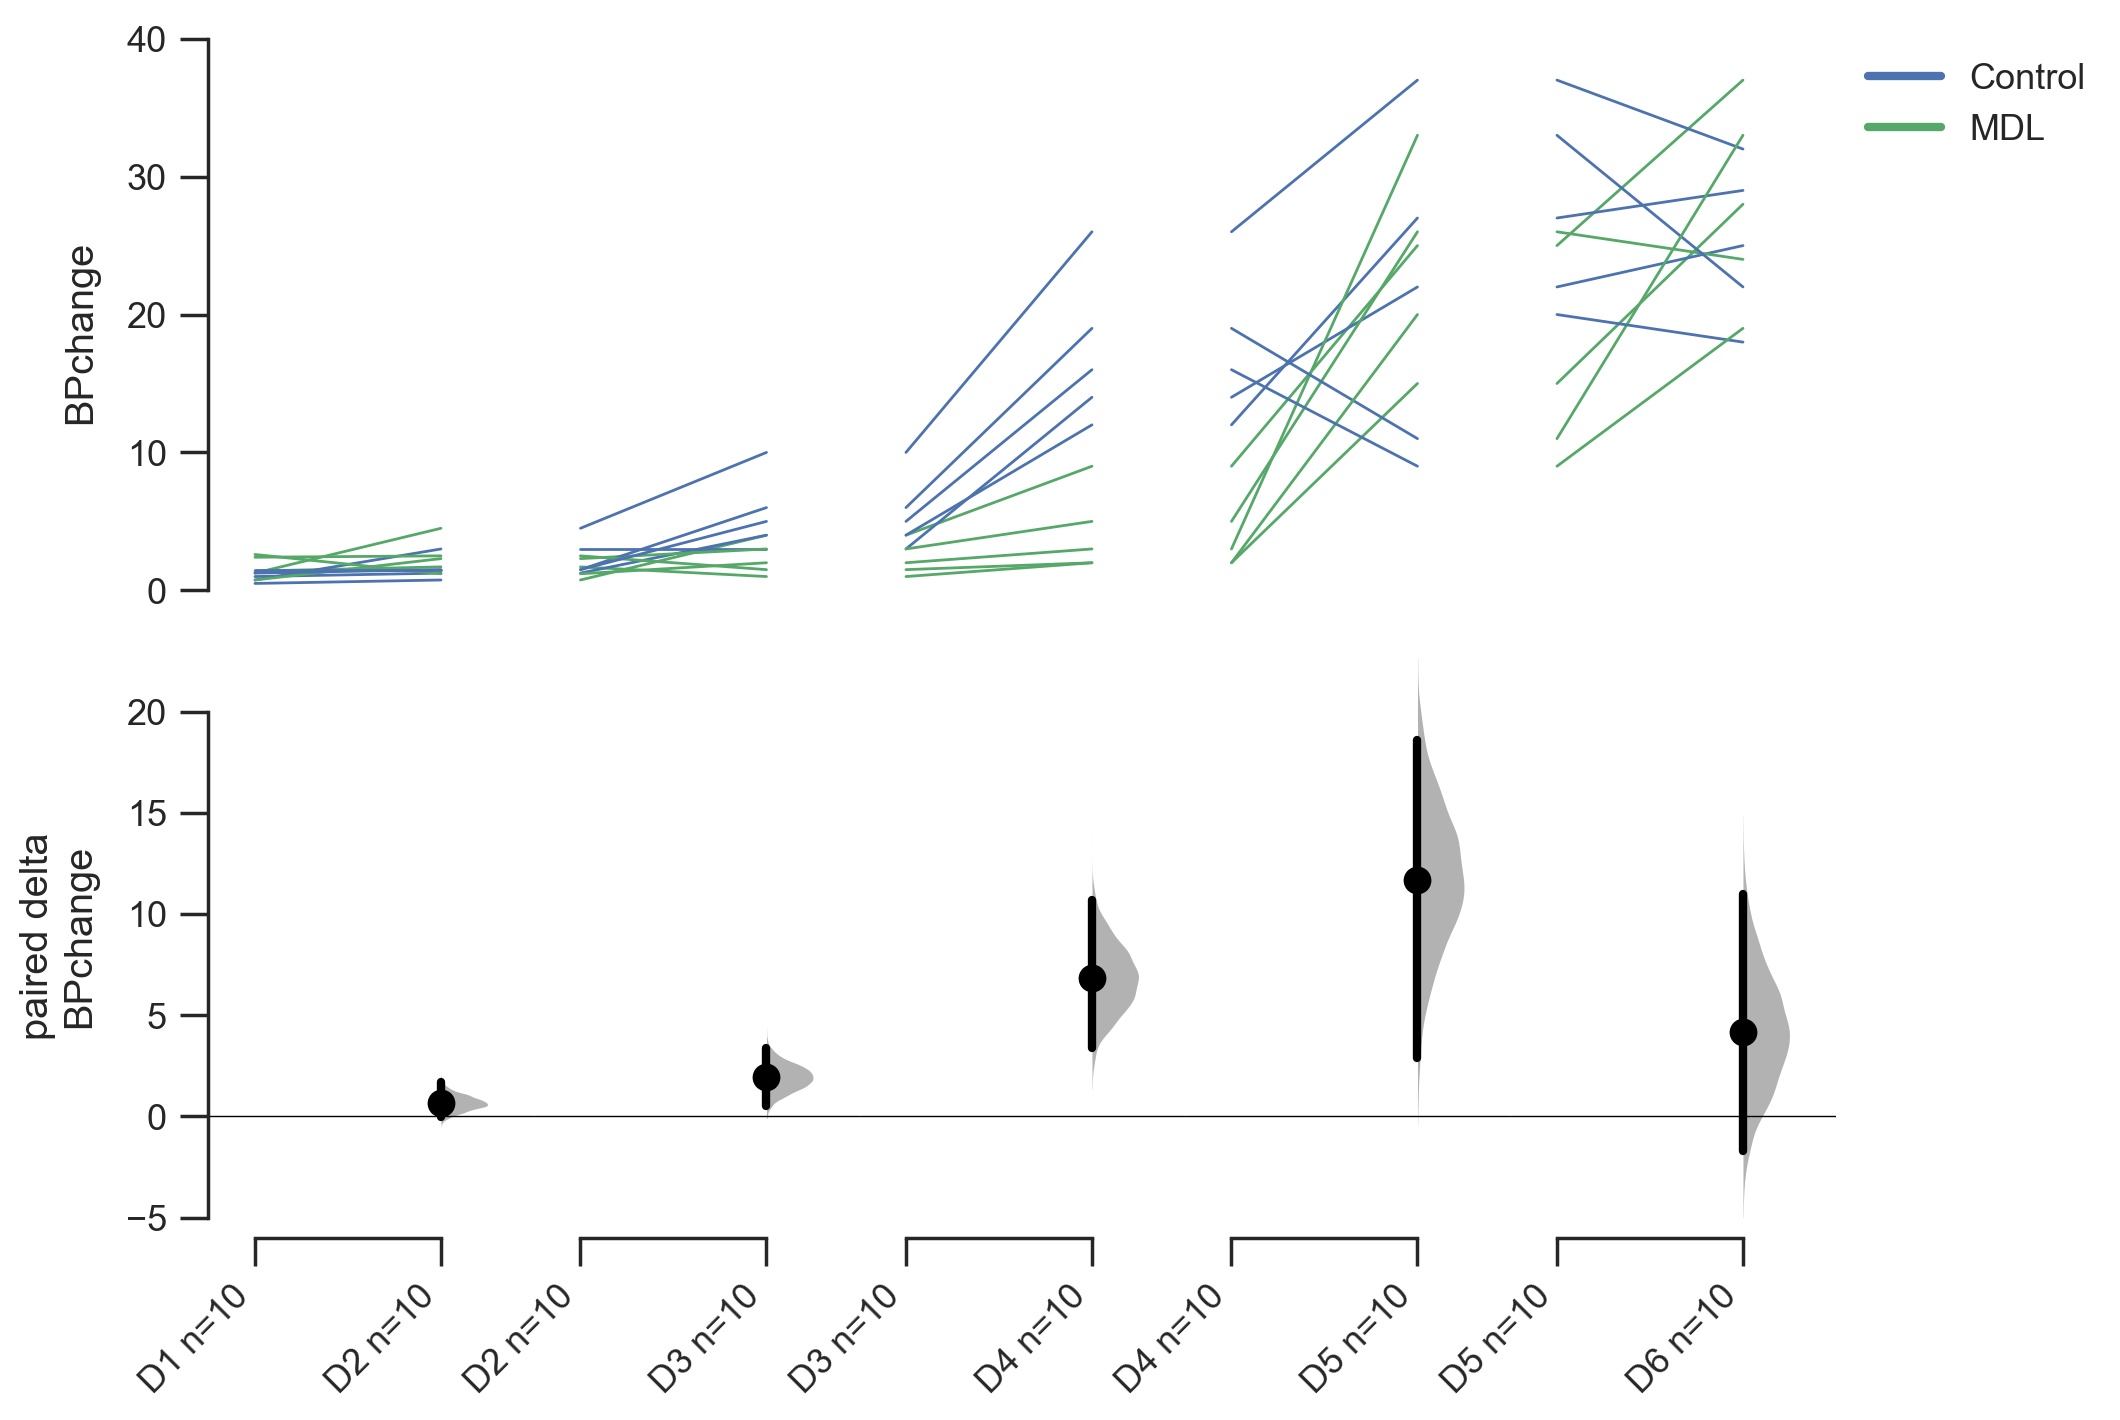

In [5]:
fig3, results3 = dabest.plot(df, x='Dose',y='BPchange',
                             color_col='Treatment',
                             idx=(('D1', 'D2'),
                                 ('D2', 'D3'),
                                  ('D3', 'D4'),
                                  ('D4', 'D5'),
                                  ('D5', 'D6')),
                            ci=97,
                            paired=True, id_col='Animal',
                            float_contrast=False)
results3

Trong 1 thí dụ khác, Ta so sánh tuần tự kết quả những lần thí nghiệm trên 5 con thỏ với nhau (không bắt cặp):

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_ind_ttest,pvalue_mann_whitney
0,R1,R2,-5.304167,-16.900000,5.683333,97.0,True,False,0.336833,0.506351
1,R2,R3,0.454167,-9.112500,9.783333,97.0,True,False,0.921159,0.885085
2,R3,R4,0.562500,-8.758333,10.758333,97.0,True,False,0.905676,0.930792
3,R4,R5,-3.095833,-11.525000,5.462500,97.0,True,False,0.469626,0.728296


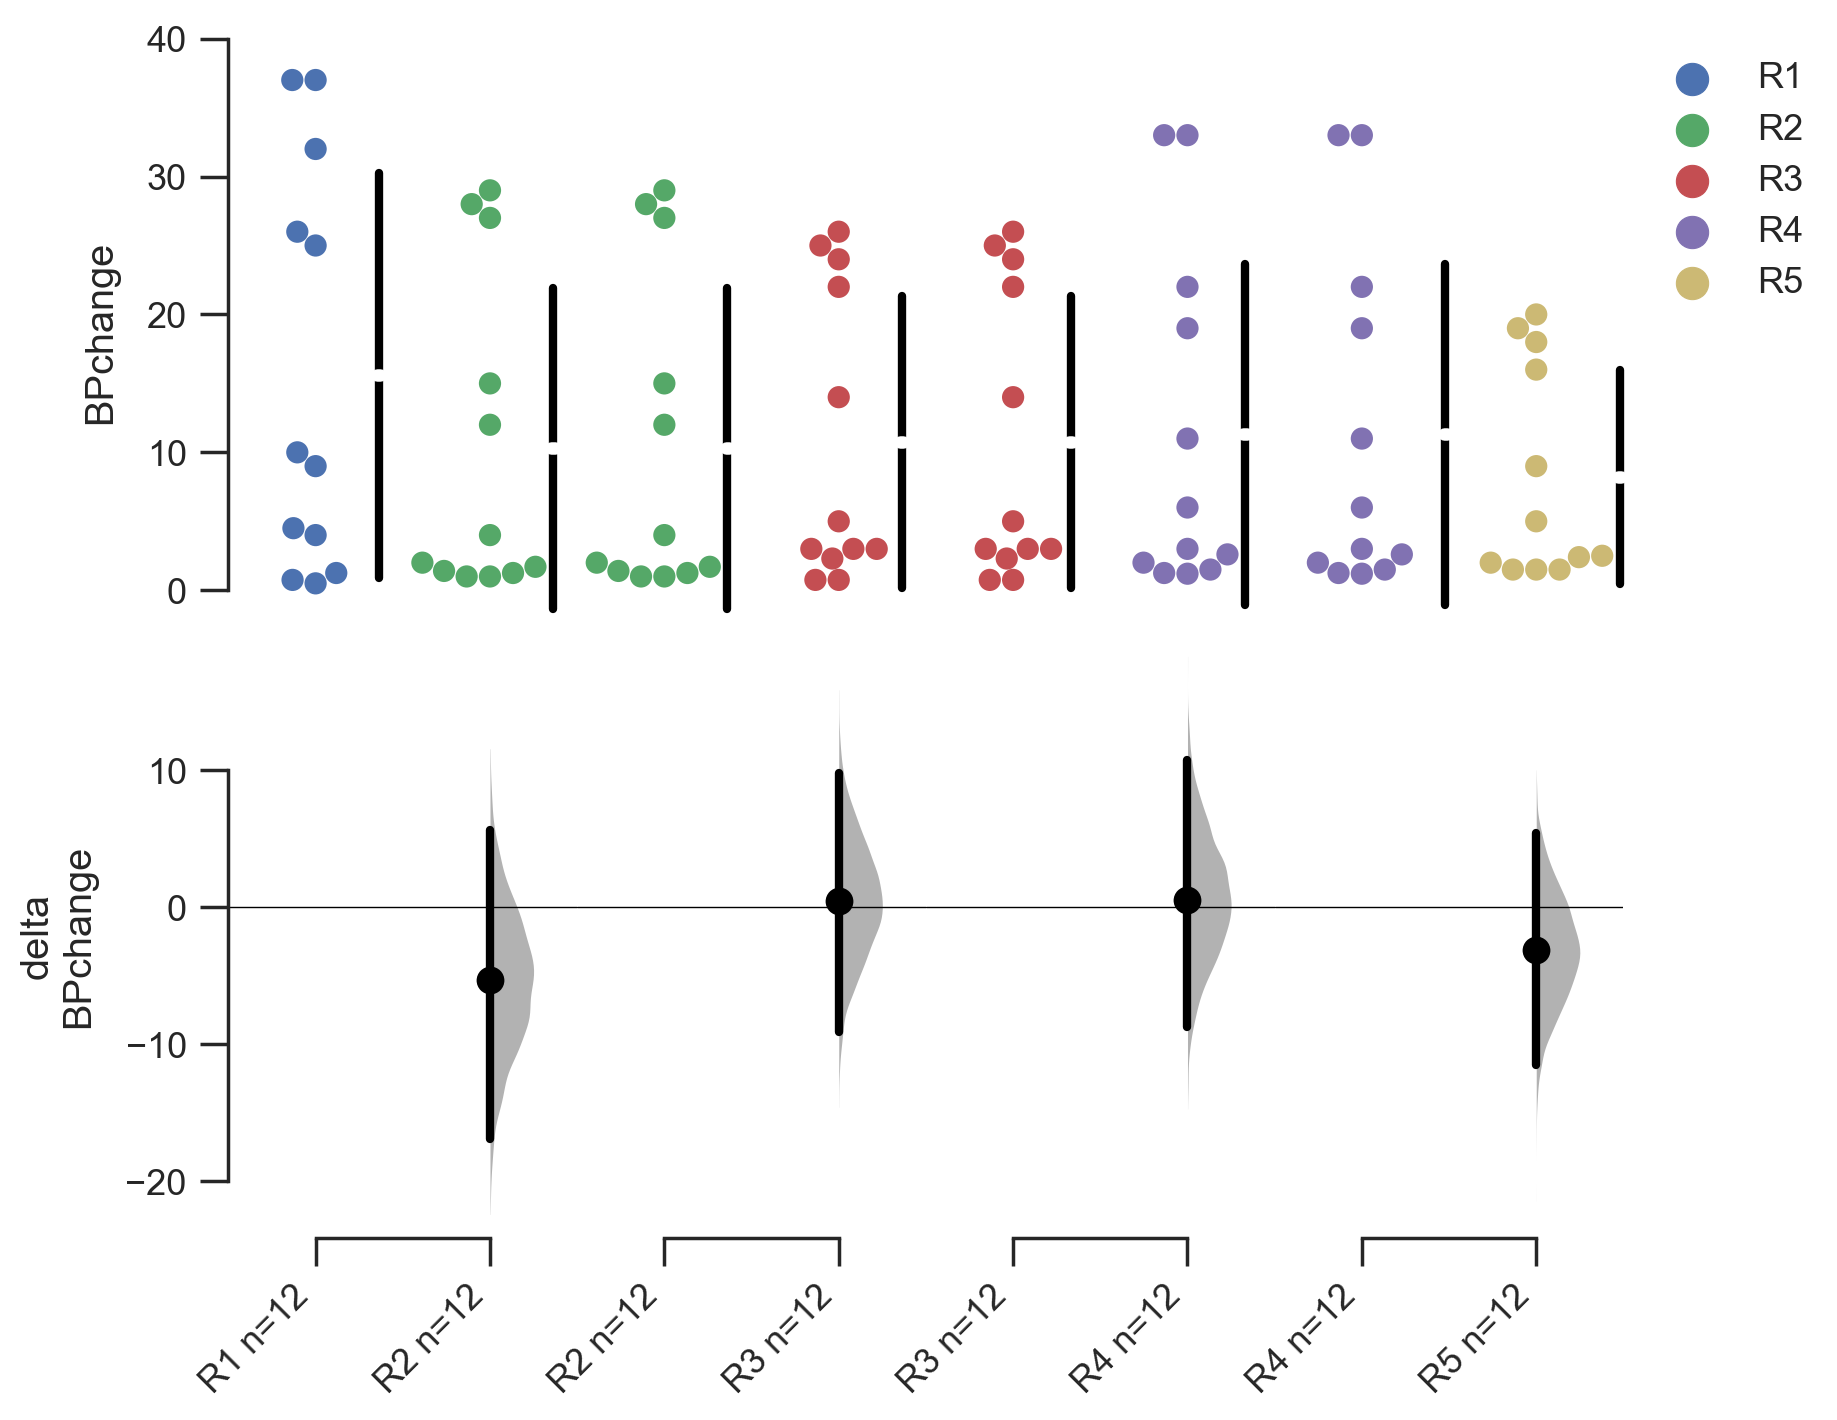

In [143]:
fig4, results4 = dabest.plot(df, x='Animal',y='BPchange',
                             color_col='Animal',
                             idx=(('R1', 'R2'),
                                 ('R2', 'R3'),
                                  ('R3', 'R4'),
                                  ('R4', 'R5')),
                            ci=97,
                            paired=False,
                            float_contrast=False)
results4

Cùng 2 phân tích trên, với tùy chỉnh float_contrast=True, dabest trình bày đồ thị rawdata ghép chung với mật độ phân bố effectsize (CI bootstrap):

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_ind_ttest,pvalue_mann_whitney
0,R1,R2,-5.304167,-16.308333,5.441667,97.0,True,False,0.336833,0.506351
1,R2,R3,0.454167,-8.795833,9.700000,97.0,True,False,0.921159,0.885085
2,R3,R4,0.562500,-9.445833,10.308333,97.0,True,False,0.905676,0.930792
3,R4,R5,-3.095833,-12.000000,5.466667,97.0,True,False,0.469626,0.728296


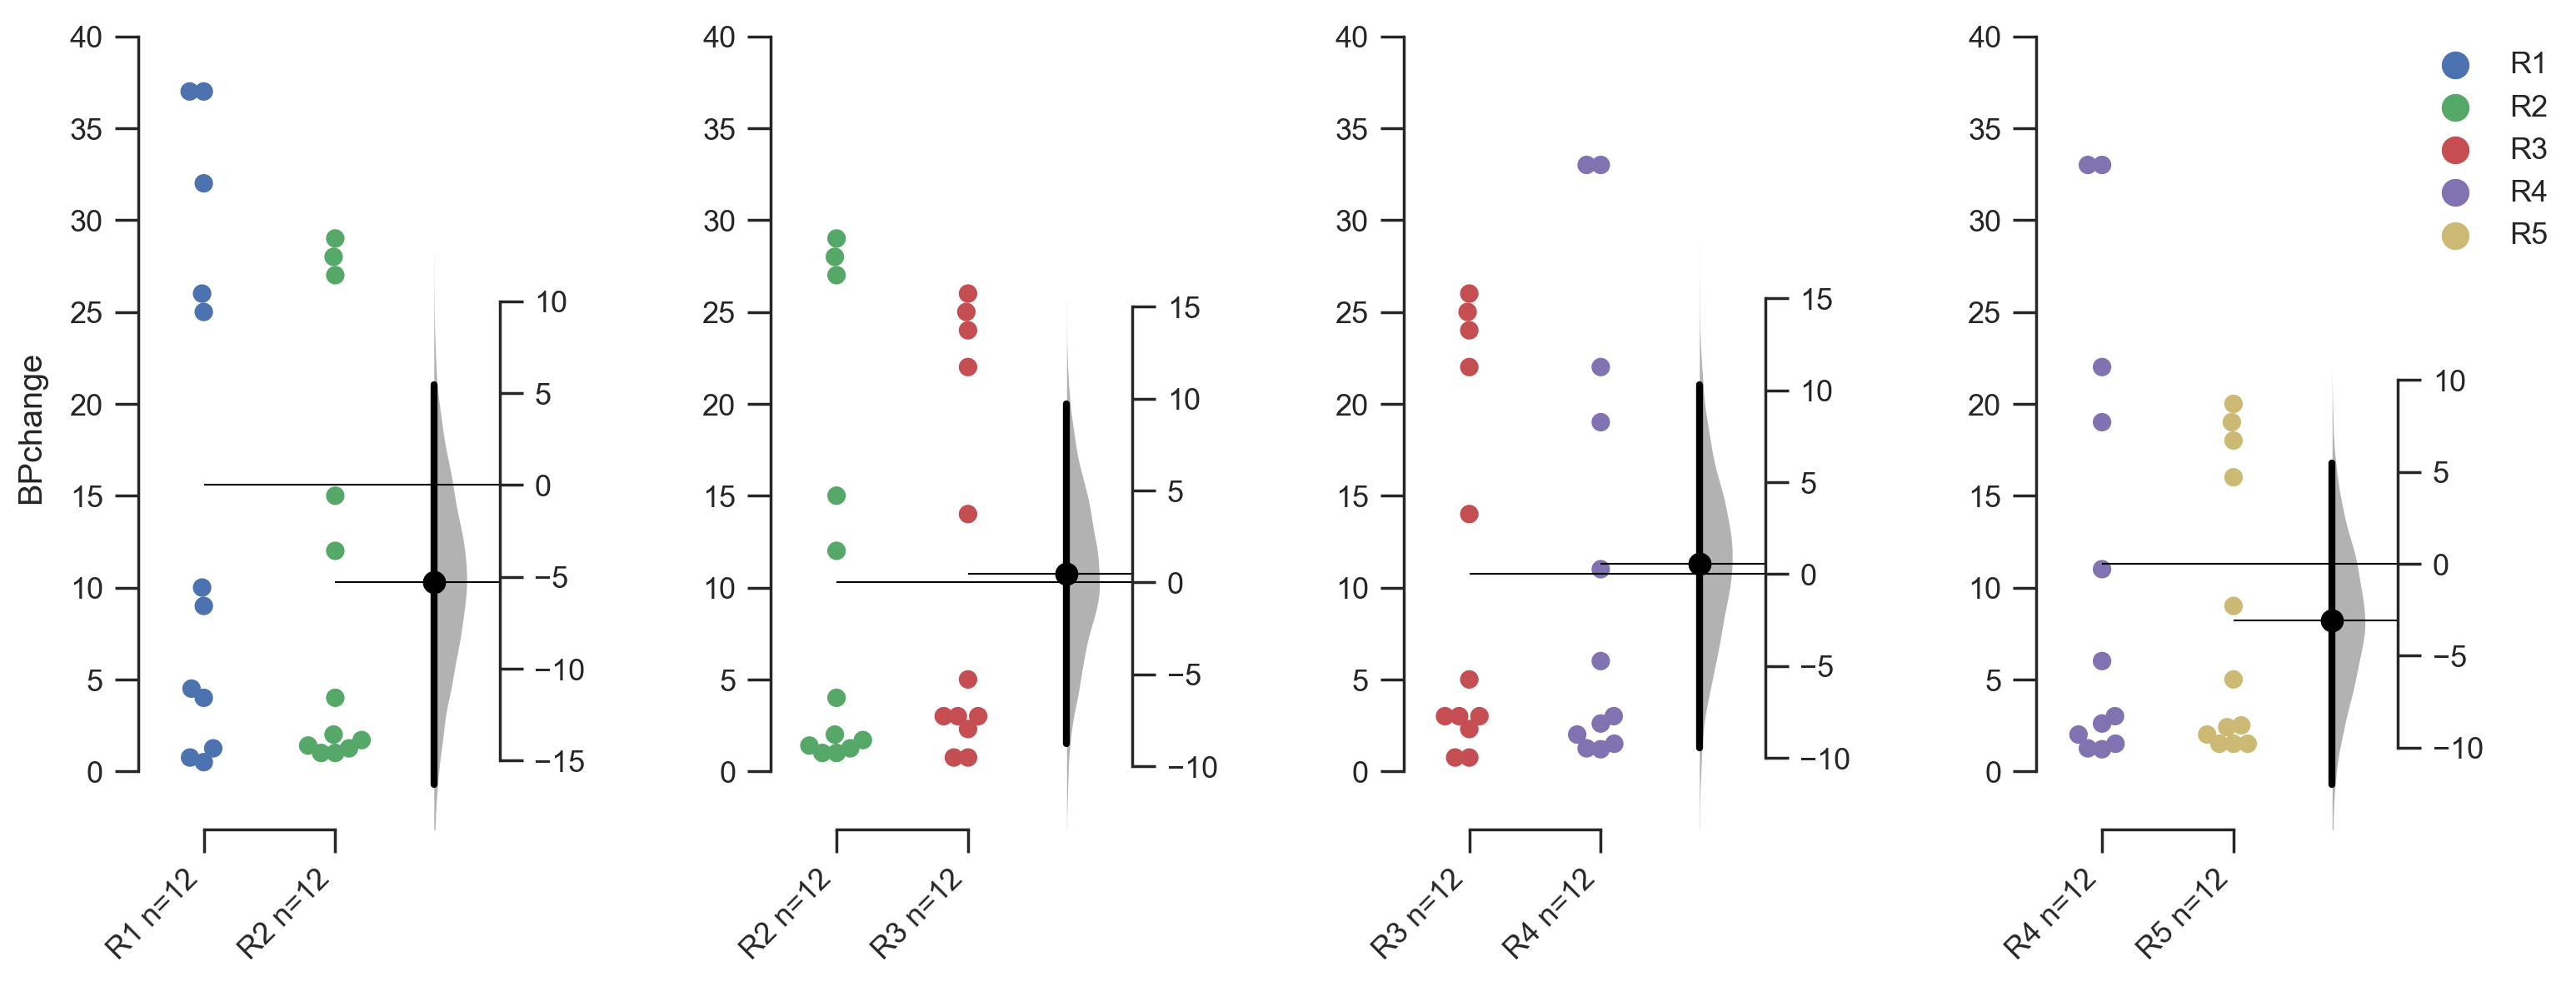

In [6]:
fig5, results5 = dabest.plot(df, x='Animal',y='BPchange',
                             color_col='Animal',
                             idx=(('R1', 'R2'),
                                 ('R2', 'R3'),
                                  ('R3', 'R4'),
                                  ('R4', 'R5')),
                            ci=97,
                            paired=False,
                            float_contrast=True)
results5

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2388: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_paired_ttest,pvalue_wilcoxon
0,D1,D2,0.68,-0.07,1.695,97.0,True,True,0.137403,0.049804
1,D2,D3,1.93,0.52,3.430,97.0,True,True,0.024699,0.038152
2,D3,D4,6.85,3.45,10.750,97.0,True,True,0.004241,0.005005
3,D4,D5,11.70,3.00,18.400,97.0,True,True,0.011797,0.014369
4,D5,D6,4.20,-1.90,10.900,97.0,True,True,0.213905,0.239897


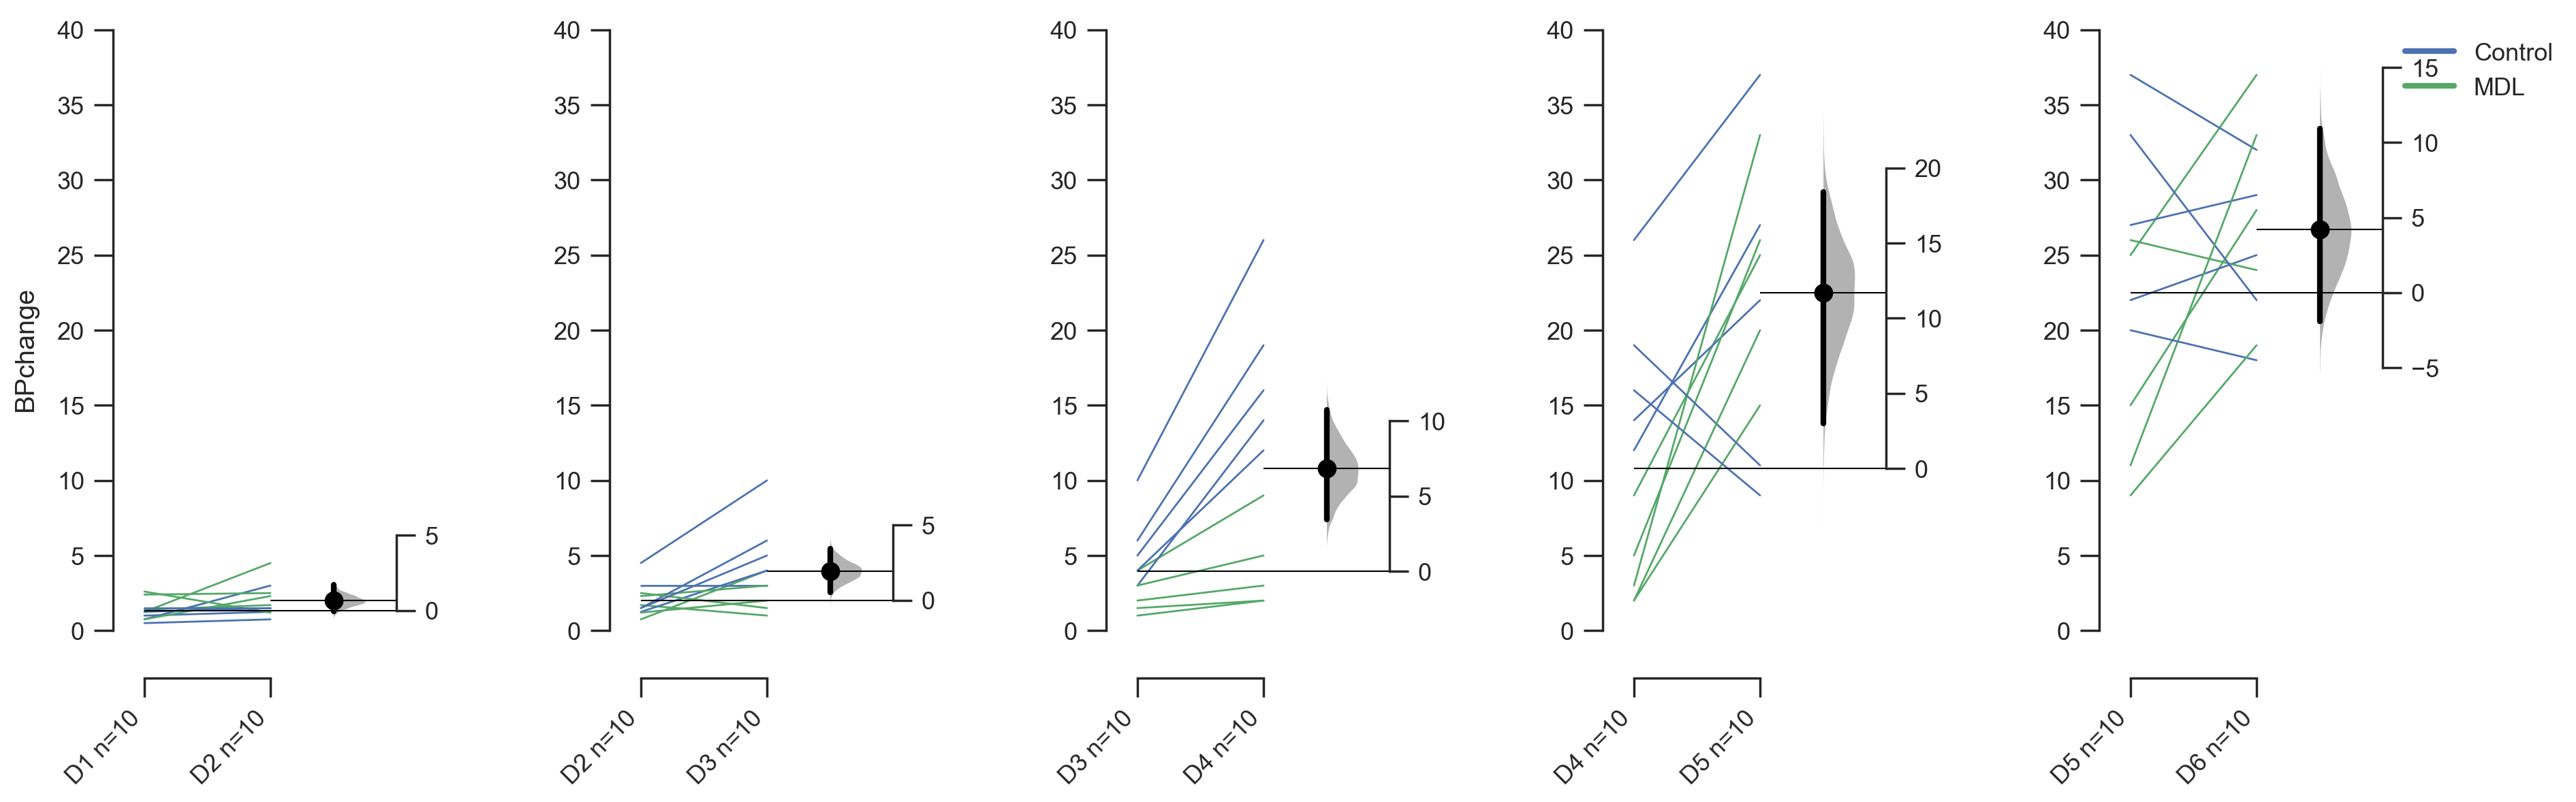

In [7]:
fig6, results6 = dabest.plot(df, x='Dose',y='BPchange',
                             color_col='Treatment',
                             idx=(('D1', 'D2'),
                                 ('D2', 'D3'),
                                  ('D3', 'D4'),
                                  ('D4', 'D5'),
                                  ('D5', 'D6')),
                            ci=97,
                            paired=True, id_col='Animal',
                            float_contrast=True)
results6

## Bootstrap posthoc test 

Ta cũng có thể chọn một phân nhóm làm mốc và so sánh bắt cặp tuần tự với nhiều phân nhóm khác, tương đương 1 post hoc test.

,reference_group,experimental_group,stat_summary,bca_ci_low,bca_ci_high,ci,is_difference,is_paired,pvalue_2samp_ind_ttest,pvalue_mann_whitney
0,D1,D2,0.68,-0.07,1.580,97.0,True,False,1.154927e-01,0.119543
1,D1,D3,2.61,1.07,4.640,97.0,True,False,7.100406e-03,0.003535
2,D1,D4,9.46,4.53,14.890,97.0,True,False,1.703059e-03,0.000575
3,D1,D5,21.16,15.27,26.995,97.0,True,False,7.643425e-07,0.000181
4,D1,D6,25.36,21.46,29.455,97.0,True,False,1.736563e-10,0.000181


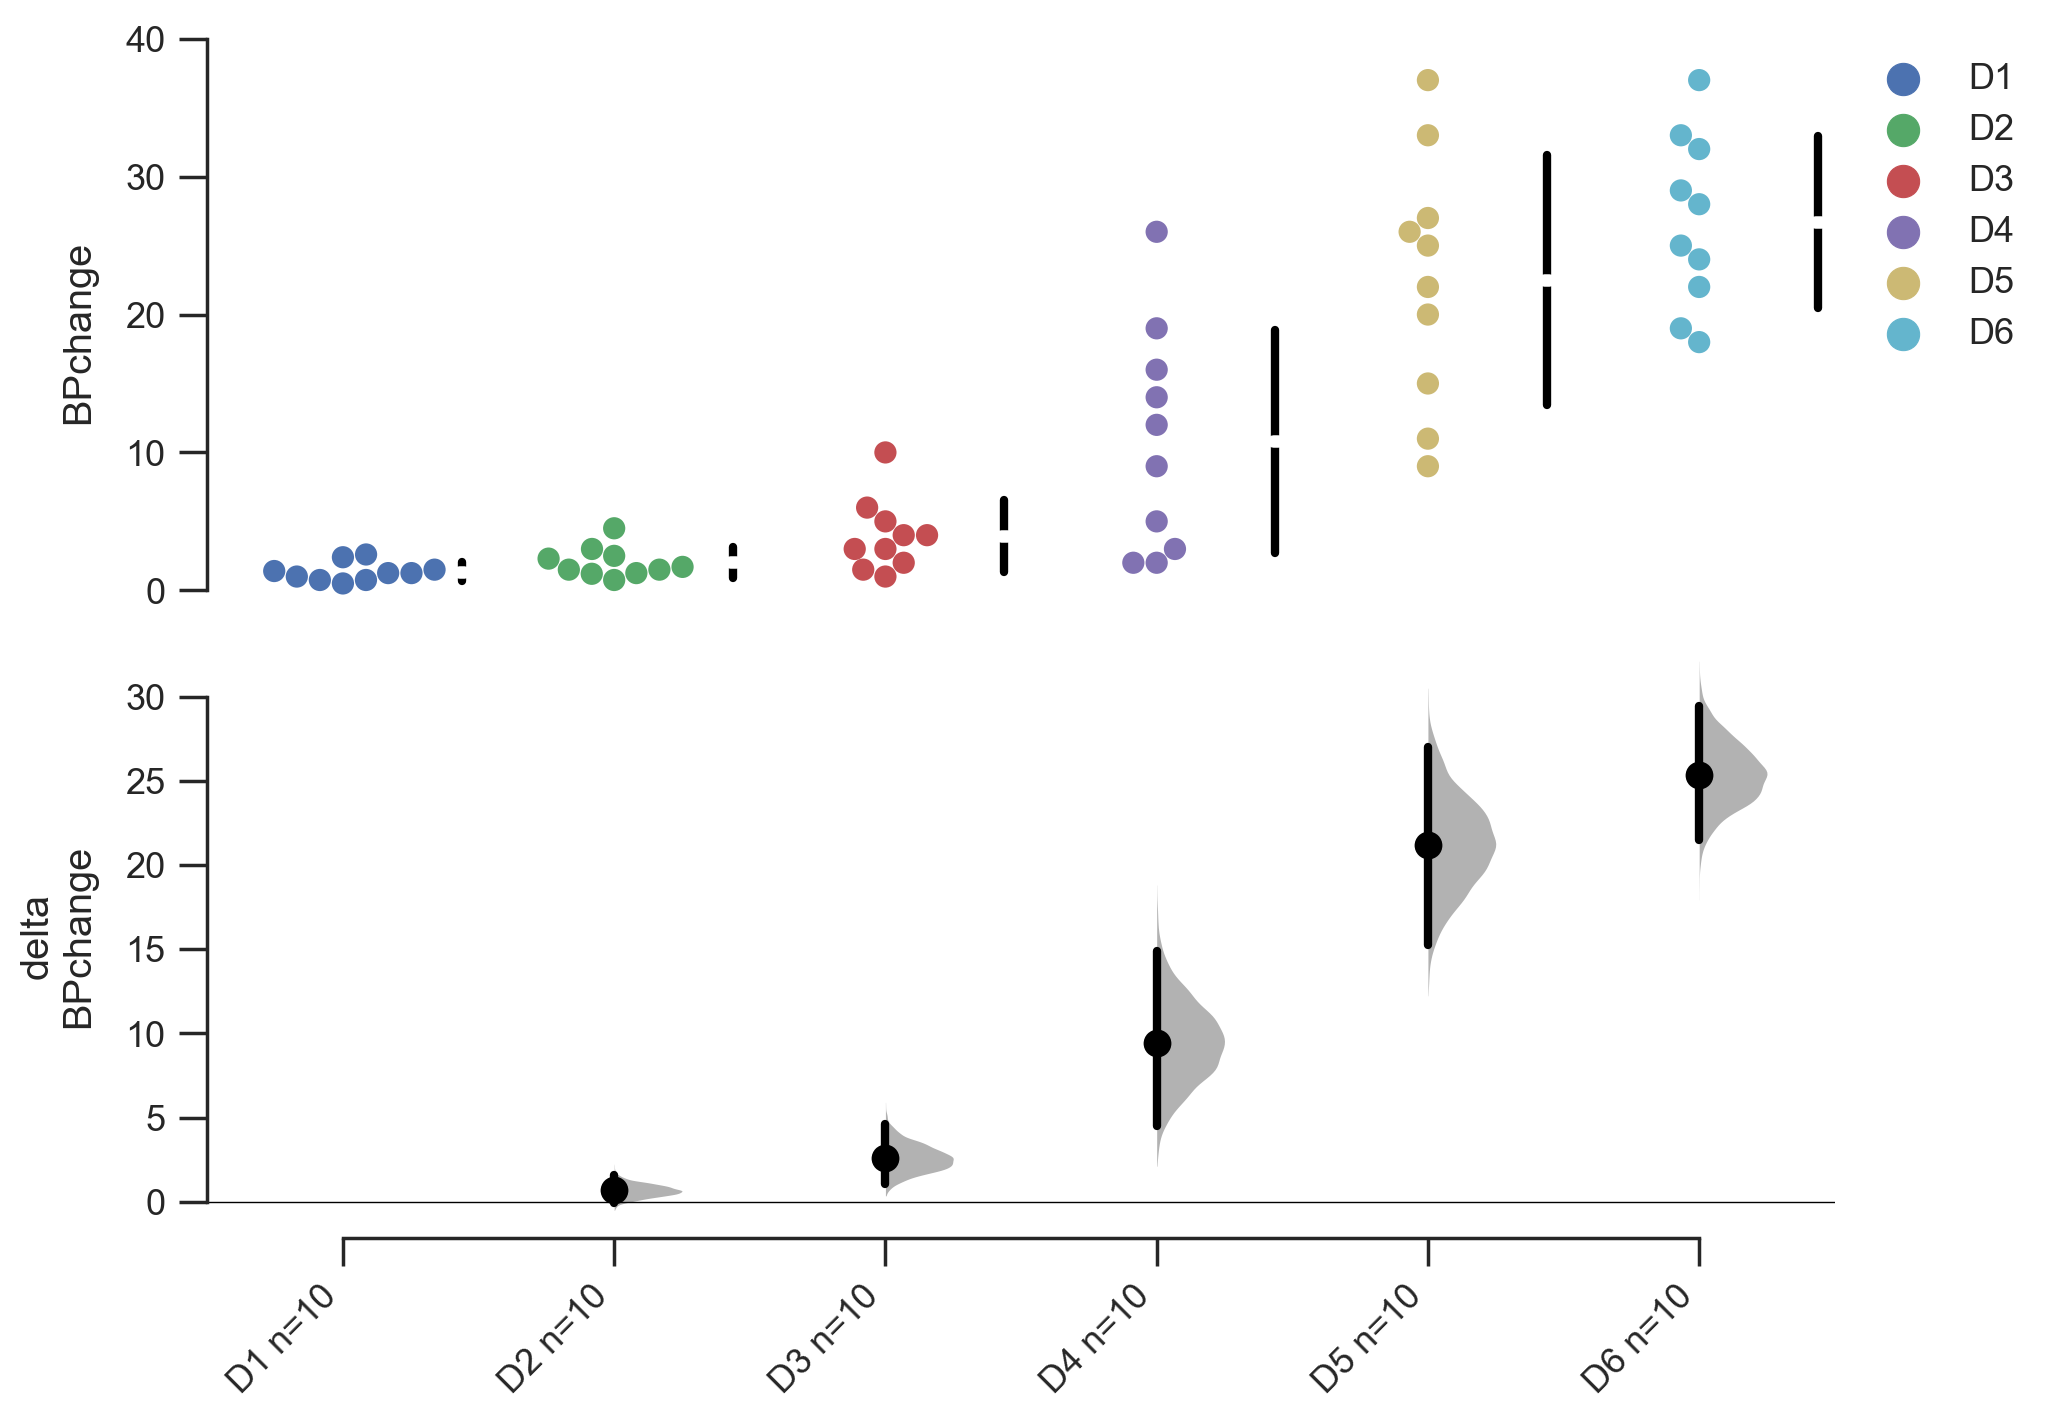

In [8]:
fig7, results7 = dabest.plot(df, x='Dose',y='BPchange',
                             color_col='Dose',
                             idx=('D1', 'D2', 'D3','D4','D5','D6'),ci=97,
                             float_contrast=False)
results7